In [68]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize

import matplotlib.pyplot as plt

from pandas_datareader import data

import warnings
warnings.filterwarnings("ignore")

## Вспомним

In [69]:
# функция случайного набора до 100%
def randomer(indx_len):
    import random
    
    lst = []
    
    while True:
        
        rnd = random.uniform(0,1)
        
        if rnd <= (indx_len/100)*(indx_len/3) \
        and sum(lst) < 0.9  \
        and len(lst) < indx_len-1:
            lst.append(rnd)
        
        if len(lst) == indx_len-1:
            lst.append(1-sum(lst))
            
        if sum(lst) > 0.9:
            elems = indx_len - len(lst)
            lefts = (1 - sum(lst))/elems
            
            if lefts > 0:
            
                for _ in range(elems):
                    lst.append(lefts)

            return lst
            

In [70]:
# составы
DJI = ['AAPL', 'WBA', 'MSFT', 'INTC', 'VZ', 'MRK', 'JPM', 'CSCO', 'KO', 'BA', 'CVX', 'DIS']
DJI_ALLOCS = dict(zip(DJI, randomer(len(DJI))))


ITs = ['FB', 'NFLX','MSFT','AAPL']

In [71]:
start_date = '2019-09-01'
end_date = '2021-09-01'

# Установка нейминов акций
tickers = DJI
weights = np.array(np.random.random(len(DJI))) 
weights = weights/np.sum(weights)  

# установка суммы на все акции)
total_inv_amount = 10000

# получаем данные с Yahoo Finance
df = data.get_data_yahoo(DJI, start_date, end_date)['Adj Close']
df1 = df.copy()
df1

Symbols,AAPL,WBA,MSFT,INTC,VZ,MRK,JPM,CSCO,KO,BA,CVX,DIS
Date,,,,,,,,,,,,
2019-09-03,50.594364,46.622478,133.285629,44.746052,52.648895,77.018837,101.377487,43.346085,51.474346,350.279633,104.731468,135.498199
2019-09-04,51.452778,47.546974,134.843445,46.593803,52.775894,76.485527,102.600830,44.110470,51.911835,352.364960,105.614220,137.068787
2019-09-05,52.458755,48.379032,137.214462,47.717690,53.147816,76.529976,104.935410,45.135857,51.306797,356.090912,105.965515,138.013123
2019-09-06,52.453838,48.591663,136.283707,48.498703,53.574158,76.947739,105.159546,45.527374,51.409191,358.759369,106.523987,138.718903
2019-09-09,52.677666,51.392895,134.735718,49.136841,53.211311,74.192291,107.764938,45.285004,50.748306,354.588654,107.541855,138.003189
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,147.539993,47.840000,299.089996,53.130001,53.959179,75.889885,160.781158,58.802757,55.123970,216.500000,97.220001,176.559998
2021-08-27,148.600006,48.480000,299.720001,53.889999,54.127186,75.622292,162.073364,58.623966,55.233147,221.750000,98.639999,180.139999
2021-08-30,153.119995,48.630001,303.589996,53.939999,54.127186,75.820511,159.479004,58.733227,55.759178,217.660004,98.389999,179.979996


In [72]:
# Сделаем корректировку по Item на кол-во средств
for k,v in DJI_ALLOCS.items():
    df1[k] = df1[k]/df1.iloc[0][k]
    df1[k] = df1[k]*v
    df1[k] = df1[k]*total_inv_amount
    
# расчет Тотал
df1['Total'] = df1.sum(axis=1)

In [73]:
df1.head(5)

Symbols,AAPL,WBA,MSFT,INTC,VZ,MRK,JPM,CSCO,KO,BA,CVX,DIS,Total
Date,,,,,,,,,,,,,
2019-09-03,6.654467,366.757834,2275.340718,2236.375465,2780.288916,3763.072044,101.377487,43.346085,51.474346,350.279633,104.731468,135.498199,12215.196663
2019-09-04,6.767370,374.030421,2301.934442,2328.724761,2786.995489,3737.014994,102.600830,44.110470,51.911835,352.364960,105.614220,137.068787,12329.138578
2019-09-05,6.899682,380.575843,2342.410467,2384.895780,2806.635964,3739.186725,104.935410,45.135857,51.306797,356.090912,105.965515,138.013123,12462.052075
2019-09-06,6.899036,382.248516,2326.521387,2423.930272,2829.150282,3759.598243,105.159546,45.527374,51.409191,358.759369,106.523987,138.718903,12534.446105
2019-09-09,6.928475,404.284529,2300.095416,2455.823941,2809.989049,3624.969528,107.764938,45.285004,50.748306,354.588654,107.541855,138.003189,12406.022884


In [74]:
df1['Daily Return'] = df1['Total'].pct_change(1)

In [75]:
# средние
print(df1['Daily Return'].mean())

# STD
print(df1['Daily Return'].std())

0.0006022226722051839
0.015460414359959158


<AxesSubplot:ylabel='Frequency'>

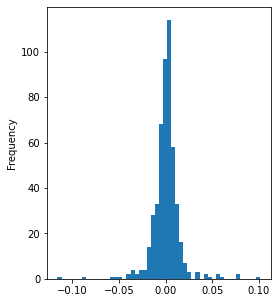

In [76]:
df1['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [77]:
#Коэффициент Шарпа по данному портфелю
# ожидаемый результат - риски / стд (но ожидаемый результат - риски == среднее значение)
sharpe_ratio = df1['Daily Return'].mean() / df1['Daily Return'].std()

In [79]:
# > 1 - Хорошо 
# > 2 - Отлично
# > 3 - Замечательно
# < 1 - Не очень(
sharpe_ratio

0.03895255703914877

In [80]:
ASR = (252**0.5) * sharpe_ratio
ASR

0.6183526731338768

In [81]:
# приводим лог. форму
log_return = np.log(df/df.shift(1))
log_return.head()

Symbols,AAPL,WBA,MSFT,INTC,VZ,MRK,JPM,CSCO,KO,BA,CVX,DIS
Date,,,,,,,,,,,,
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.016824,0.019635,0.011620,0.040464,0.002409,-0.006948,0.011995,0.017481,0.008463,0.005936,0.008393,0.011525
2019-09-05,0.019363,0.017348,0.017431,0.023835,0.007022,0.000581,0.022499,0.022980,-0.011724,0.010519,0.003321,0.006866
2019-09-06,-0.000094,0.004385,-0.006806,0.016235,0.007990,0.005444,0.002134,0.008637,0.001994,0.007466,0.005256,0.005101
2019-09-09,0.004258,0.056048,-0.011424,0.013072,-0.006796,-0.036466,0.024474,-0.005338,-0.012939,-0.011693,0.009510,-0.005173


In [83]:
meanReturns = log_return.mean() 
covMatrix = log_return.cov()
rfr = 0.0011

## Время составлять портфели

### Используем метод Монте-Карло

Не самый быстрый, но и не самый медленный.

Откуда проблема скорости?

In [84]:
tickers = DJI
percent_alloc = DJI_ALLOCS

In [85]:
# Monte Carlo
num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(df.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios): 
    # веса
    weights = np.array(np.random.random(len(tickers))) 
    weights = weights/np.sum(weights)  
	
    # записываем получившиеся веса
    all_weights[ind,:] = weights
	
    # ожидаемый доход по портфелю
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # ожидаемая волотильность
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Коэф.Шарпа по портфелю
    sharpe_arr[ind] = (ret_arr[ind]-rfr)/vol_arr[ind]

In [86]:
# какой получим наилучший вариант
sharpe_arr.max()

0.9152539547309512

In [87]:
#% акций в портфеле
argmax = sharpe_arr.argmax()
all_weights[argmax,:]

array([0.21856263, 0.07366472, 0.20400587, 0.02931868, 0.06433242,
       0.06983392, 0.0875255 , 0.10932788, 0.10368385, 0.01926192,
       0.01443159, 0.00605102])

In [88]:
pd.DataFrame(all_weights[argmax,:], index=tickers).T

,AAPL,WBA,MSFT,INTC,VZ,MRK,JPM,CSCO,KO,BA,CVX,DIS
0,0.218563,0.073665,0.204006,0.029319,0.064332,0.069834,0.087525,0.109328,0.103684,0.019262,0.014432,0.006051


In [89]:
# Ожидаемый доход и волотильность
max_sr_ret = ret_arr[argmax]
max_sr_vol = vol_arr[argmax]
print("Доход", round(max_sr_ret,2))
print("Волотильность", round(max_sr_vol,2))

Доход 0.25
Волотильность 0.27


In [90]:
#посмотрим % наименьшего риска
min_vol = vol_arr.min()

In [91]:
#менее рисковый портфель
argmin = vol_arr.argmin()
all_weights[argmin,:]

array([9.89386499e-04, 1.54284055e-01, 5.68566795e-02, 2.57688864e-02,
       1.80905817e-01, 2.23954900e-01, 6.30002621e-02, 8.33612137e-02,
       1.02845083e-01, 6.25499621e-05, 1.63364206e-02, 9.16347469e-02])

In [92]:
pd.DataFrame(all_weights[argmin,:], index=tickers).T

,AAPL,WBA,MSFT,INTC,VZ,MRK,JPM,CSCO,KO,BA,CVX,DIS
0,0.000989,0.154284,0.056857,0.025769,0.180906,0.223955,0.063,0.083361,0.102845,0.000063,0.016336,0.091635


In [93]:
# Ожидаемый доход и волотильность
min_vol_ret = ret_arr[argmin]
min_vol_sr = sharpe_arr[argmin]
print("Доход", round(min_vol_ret,2))
print("Коэф.Шарпа", round(min_vol_sr,2))

Доход 0.08
Коэф.Шарпа 0.33


In [94]:
min_vol

0.23135865434226813

### Визуализируем

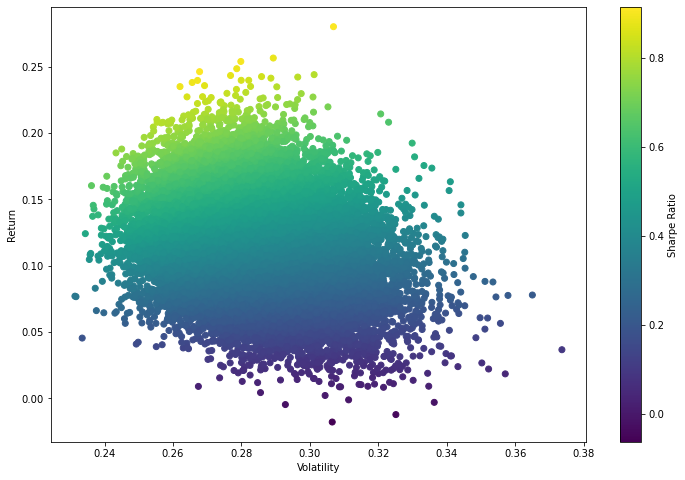

In [95]:
#Волотильность к доходу
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

In [97]:
max_sr_vol, max_sr_ret

(0.2677701001318006, 0.24617764310433327)

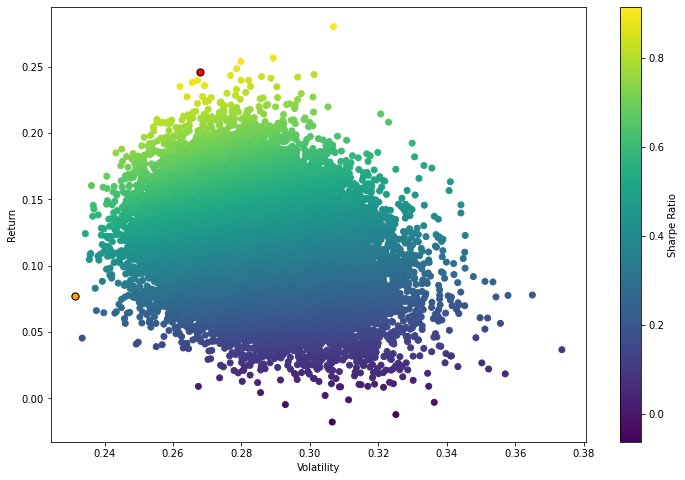

In [96]:
# Визуализируем минимальную волотильность и максимальный коэф.Шарпа
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,marker ='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black');  # Шарп
plt.scatter(min_vol, min_vol_ret, c='orange', s=50, edgecolors='black'); # Волотильность

### Визуализируем вклад в портфель и коэф.Шарпа

In [ ]:
# функция расчета дохода, волотильности и Шарпа
def ret_vol_sr(weights, period = 252):
    weights = np.array(weights)
    
    # period - расчет на год (можно изменить длину)
    ret = np.sum(log_return.mean()*weights)*period
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr = (ret-rfr)/vol
    return np.array([ret,vol,sr])

In [ ]:
# минимальный отрицательный Шарп
def neg_sharpe(weights): 
    return ret_vol_sr(weights)[2] * -1

# проверка весов == 1 (100%)
def check_sum(weights): 
    return np.sum(weights) - 1

# минимизация волотильности
def portfolio_vol(weights): 
    return ret_vol_sr(weights)[1]

# оптимизация портфолио на период
def portfolio_ret(weights, period = 252):
    return ret_vol_sr(weights)[0]

In [98]:
# расчет вариацией % в портфеле
percent_alloc = 1/len(tickers)
init_guess = []
for i in range(len(tickers)):
    init_guess.append(percent_alloc)
    
# формирование процента % (или воспользуемся функции из первого варианта)
bounds = tuple( (0,1) for asset in range(len(tickers)))

# создание константных значений для расчетов
cons1 = ({'type':'eq','fun':check_sum})
targetReturns = np.linspace(0.02, 0.30, 50)

# расчет портфолию с минимум волотильности (+ создание константы константа)
efficientPortfolios=[]
for target in targetReturns:
    cons2 = ({'type':'eq','fun':lambda x: portfolio_ret(x)-target},{'type':'eq','fun':check_sum})
    efficientPortfolios.append(minimize(portfolio_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons2)) 

In [101]:
# Оптимизируем портфолио
max_sharpe_portfolio = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons1)
min_vol_portfolio = minimize(portfolio_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons1)


In [102]:
max_sharpe_portfolio

     fun: -1.4864441907015213
     jac: array([-0.00297633,  0.41812338, -0.0029579 ,  0.78984736,  0.3067794 ,
        0.50307482,  0.16644487,  0.39232276,  0.43106234,  1.79673335,
        0.93359795,  0.28629227])
 message: 'Optimization terminated successfully'
    nfev: 78
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([9.91604790e-01, 0.00000000e+00, 8.39521001e-03, 8.11525326e-16,
       0.00000000e+00, 2.52944367e-16, 0.00000000e+00, 2.00252141e-16,
       1.46150453e-16, 2.50450702e-16, 0.00000000e+00, 0.00000000e+00])

In [104]:
min_vol_portfolio

     fun: 0.19206007491294577
     jac: array([0.19202745, 0.20543186, 0.19889455, 0.22013865, 0.19211834,
       0.19166222, 0.24931109, 0.2061316 , 0.19253843, 0.2842186 ,
       0.25065089, 0.19214658])
 message: 'Optimization terminated successfully'
    nfev: 117
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.79310779e-02, 2.75387352e-17, 0.00000000e+00, 0.00000000e+00,
       7.78427089e-01, 1.53754571e-01, 2.05998413e-18, 3.25260652e-19,
       3.08431795e-02, 2.10335221e-17, 1.30104261e-17, 1.90440827e-02])

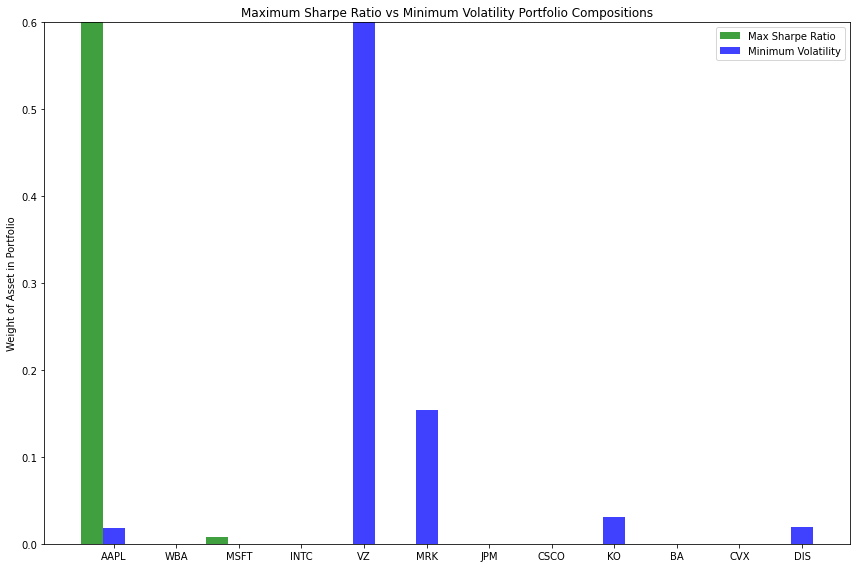

In [105]:
# визуализируем
ind = np.arange(len(tickers))
width = 0.35
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, max_sharpe_portfolio['x'], width, color='g', alpha=0.75)
rects2 = ax.bar(ind + width, min_vol_portfolio['x'], width, color='b', alpha=0.75)

ax.set_ylabel('Weight of Asset in Portfolio')
ax.set_ylim(0,0.6)
ax.set_title('Maximum Sharpe Ratio vs Minimum Volatility Portfolio Compositions')
ax.set_xticks(ind + width)
ax.set_xticklabels(tickers)
plt.tight_layout()
ax.legend((rects1[0], rects2[0]), ('Max Sharpe Ratio', 'Minimum Volatility'))
#plt.savefig('Portfolio Compositions', dpi=100)
plt.show()
